# Setup

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns
import glob
from scipy.stats.stats import pearsonr
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score
from sklearn.neural_network import MLPClassifier, MLPRegressor


In [21]:
# which datasets to read and write

do_indian_pines = True 
do_salient_objects = True
do_plastic_flakes = True
do_soil_moisture = True


## Define functions

In [22]:
# reward functions

def calculate_correlations(data, num_bands_originally, num_bands_kept):
    
    selected_bands = np.random.randint(0,num_bands_originally,num_bands_kept)
    corr_sum = 0
    for i in selected_bands:
        for j in selected_bands:
            
            corr_sum += pearsonr(data[:, i], 
                                 data[:, j])[0]
            
    return corr_sum/(len(selected_bands)**2)


def calculate_mutual_infos(data, num_bands_originally, num_bands_kept):
    
    selected_bands = np.random.randint(0,num_bands_originally,num_bands_kept)
    normalized_mutual_info_score_sum = 0
    for i in selected_bands:
        for j in selected_bands:
            
            normalized_mutual_info_score_sum += normalized_mutual_info_score(data[:, i],
                                                                             data[:, j])
            
    return normalized_mutual_info_score_sum/(len(selected_bands)**2)


In [26]:
## dataset loading
np.random.seed(seed=42)

def load_datasets(Dataset, train_val_split=False):
    
    np.random.seed(seed=42)
    
    if Dataset == 'SM':
        hyper_path = '../data/soil_moisture/hyperspectral_imagery/*npy'
        hyper = np.load(glob.glob(hyper_path)[0])
        gt_path = '../data/soil_moisture/gt_labels/*npy'
        gt = np.load(glob.glob(gt_path)[0])
        
        
    if Dataset == 'IN':
        data_path = 'land_cover_classification/indian_pines/'

        
    if Dataset == 'SO':
        data_path = 'salient_objects_segmentation/HS-SOD/'
              
            
    if Dataset == 'PF':
        data_path = 'plastic_flakes_segmentation/HSOD-ICIP-2022/baselines_cropped/training/'

        
    return hyper, gt


## Soil moisture regression

In [33]:
# load data

if do_soil_moisture:
    
    hyper, gt = load_datasets(
        'SM')
    
    print('\nDataset info...')
    print('The shape of the original imagery:', hyper.shape)
    print('The shape of the original labels:', gt.shape)
    


Dataset info...
The shape of the original imagery: (679, 125)
The shape of the original labels: (679,)



Correlation reward for random 10 bands, x25 runs: 0.987744527338685
Normalized mutual information reward for random 10 bands, x25 runs: 0.695468234965127


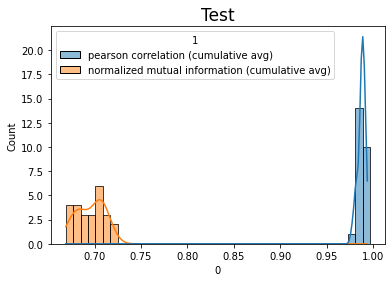

<Figure size 432x288 with 0 Axes>

In [68]:
# rewards
    
if do_soil_moisture:
    num_runs = 25
    
    correlations = []
    for i in range(num_runs):
        correlations.append(calculate_correlations(hyper, num_bands_originally=hyper.shape[-1], num_bands_kept=10))
    print(f'\nCorrelation reward for random 10 bands, x{num_runs} runs:', np.mean(correlations))
    
    mis = []
    for i in range(num_runs):
        mis.append(calculate_mutual_infos(hyper, num_bands_originally=hyper.shape[-1], num_bands_kept=10))
    print(f'Normalized mutual information reward for random 10 bands, x{num_runs} runs:', np.mean(mis))
    
    # plot rewards
    a_string = ['pearson correlation (cumulative avg)'] * len(correlations)    
    b_string = ['normalized mutual information (cumulative avg)'] * len(mis)
    strings = a_string + b_string
    pd_df = pd.DataFrame([correlations+mis, strings]).T
    pd_df[0] = pd_df[0].astype(float, copy=True)
    sns.histplot(data=pd_df, binwidth=0.008, x=0, hue=1, kde=True)
    plt.title(f'Test', fontsize=17)
    #plt.xlim([0,1])
    plt.show()
    plt.figure()

In [ ]:
# baseline models